# Week 4

In [54]:
# Samuel Harris
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [55]:
df = pd.read_csv('/Users/samharris/Desktop/Capstone/24Spr_-S-Harris-_-disasters-/Sample_Capstone/data/em_dat_since2000_and_w_bank.csv')
print(df.shape)
df.head()

(15573, 44)


,DisNo.,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,...,i_mort,co2_emissions,electricity_percentage,life_expectancy,mv_gdp,mv_imort,mv_electy,mv_pop_den,mv_co2,mv_lf_exp
0,1999-9388-DJI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,DJI,Djibouti,Sub-Saharan Africa,...,78.0,0.491842,56.119118,56.903,2.0,10.0,3.0,3.0,3.0,1.0
1,1999-9388-SDN,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,SDN,Sudan,Northern Africa,...,67.0,0.216388,23.000000,58.319,1.0,9.0,1.0,1.0,2.0,2.0
2,1999-9388-SOM,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,SOM,Somalia,Sub-Saharan Africa,...,104.5,0.055793,2.109354,50.660,NaN,10.0,1.0,1.0,1.0,1.0
3,2000-0001-AGO,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,AGO,Angola,Sub-Saharan Africa,...,121.9,0.988416,24.238865,46.024,1.0,10.0,1.0,1.0,4.0,1.0
4,2000-0002-AGO,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,AGO,Angola,Sub-Saharan Africa,...,121.9,0.988416,24.238865,46.024,1.0,10.0,1.0,1.0,4.0,1.0


In [56]:
df['Location'].head(10)

0    Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...
1    Northern Darfur, Northern Kordofan, Red Sea pr...
2    Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...
3                                               Calulo
4    Dombre Grande village (Baia Farta district, Be...
5    Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...
6               Pouso Redondo (Etat de Santa Catarina)
7                                               Fujian
8                            Xiangtan (Hunan Province)
9                                             Al-Ayyat
Name: Location, dtype: object

# Spatial Analysis

In [57]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected', 'Total Damage, Adjusted ('000 US$)',
       'Admin Units', 'gdp_per_cap', 'pop_den', 'i_mort', 'co2_emissions',
       'electricity_percentage', 'life_expectancy', 'mv_gdp', 'mv_imort',
       'mv_electy', 'mv_pop_den', 'mv_co2', 'mv_lf_exp'],
      dtype='object')

In [58]:
# Rescale Cost to be in millions
df.rename(columns={"Total Damage, Adjusted ('000 US$)": "Total Damage, Adjusted (US$ (millions)"}, inplace=True)

df["Total Damage, Adjusted (US$ (millions)"] = (df["Total Damage, Adjusted (US$ (millions)"] / 1000000)

In [59]:
def summary_statistics_by_region(data, variable):
    # Generate title from variable name
    title = f"Summary Statistics for '{variable}' by Region"

    print(title)
    
    # Grouping by 'Region' and 'Subregion' and calculating summary statistics
    summary_stats = data.groupby(['Region', 'Subregion'])[variable].describe()
    
    # Reset index to access 'Region' and 'Subregion' as columns
    summary_stats_reset = summary_stats.reset_index()
    
    # Sorting by mean within each region
    summary_stats_sorted = summary_stats_reset.sort_values(by=['Region', 'mean'], ascending=[True, False])
    
    # Set the DataFrame index
    summary_stats_sorted.set_index(['Region', 'Subregion'], inplace=True)
    
    return summary_stats_sorted


#summary_statistics_by_region(df, 'Total Deaths')
#summary_statistics_by_region(df, 'Total Affected')
summary_statistics_by_region(df, "Total Damage, Adjusted (US$ (millions)")

Summary Statistics for 'Total Damage, Adjusted (US$ (millions)' by Region


count      mean        std  \
Region   Subregion                                                     
Africa   Northern Africa                   32.0  0.490988   1.403824   
         Sub-Saharan Africa               150.0  0.199788   0.538602   
Americas Northern America                 463.0  3.533057  12.997966   
         Latin America and the Caribbean  412.0  0.805633   4.577440   
Asia     Eastern Asia                     606.0  2.050966  12.637831   
         Southern Asia                    236.0  0.969711   2.326239   
         Western Asia                      56.0  0.649206   2.357134   
         South-eastern Asia               487.0  0.337523   2.513337   
         Central Asia                      28.0  0.078608   0.217396   
Europe   Western Europe                    93.0  1.863892   5.208416   
         Northern Europe                   41.0  1.155749   1.985496   
         Southern Europe                  125.0  1.121029   2.832154   
         Eastern Europe                   129.0  0.337149   0.666198   
Oceania  Australia and New Zealand        113.0  0.951193   2.361121   
         Polynesia                         14.0  0.079699   0.074097   
         Melanesia                         30.0  0.069795   0.159707   
         Micronesia                         6.0  0.038917   0.052225   

                                               min       25%       50%  \
Region   Subregion                                                       
Africa   Northern Africa                  0.000075  0.009699  0.063948   
         Sub-Saharan Africa               0.000013  0.005877  0.025182   
Americas Northern America                 0.000263  0.197582  0.764798   
         Latin America and the Caribbean  0.000017  0.012419  0.077058   
Asia     Eastern Asia                     0.000017  0.052470  0.239277   
         Southern Asia                    0.000000  0.027258  0.149751   
         Western Asia                     0.000000  0.016180  0.100288   
         South-eastern Asia               0.000000  0.002976  0.017997   
         Central Asia                     0.000282  0.002464  0.010601   
Europe   Western Europe                   0.000080  0.149855  0.445445   
         Northern Europe                  0.000081  0.103248  0.422838   
         Southern Europe                  0.000268  0.066393  0.220045   
         Eastern Europe                   0.000081  0.010759  0.054542   
Oceania  Australia and New Zealand        0.000813  0.054001  0.134129   
         Polynesia                        0.002388  0.013410  0.070760   
         Melanesia                        0.000726  0.007118  0.023335   
         Micronesia                       0.000813  0.002674  0.009816   

                                               75%         max  
Region   Subregion                                              
Africa   Northern Africa                  0.435835    7.954379  
         Sub-Saharan Africa               0.137726    4.200000  
Americas Northern America                 2.348681  187.319074  
         Latin America and the Caribbean  0.441412   81.186997  
Asia     Eastern Asia                     0.875267  273.218373  
         Southern Asia                    0.735157   19.779307  
         Western Asia                     0.369356   16.961487  
         South-eastern Asia               0.100525   52.041595  
         Central Asia                     0.067652    1.141789  
Europe   Western Europe                   1.256261   43.201120  
         Northern Europe                  1.481690   10.027082  
         Southern Europe                  0.801300   20.139674  
         Eastern Europe                   0.299711    4.133704  
Oceania  Australia and New Zealand        0.674169   19.515598  
         Polynesia                        0.123636    0.232409  
         Melanesia                        0.056933    0.731615  
         Micronesia                       0.076610    0.113889

#### Highest Median Costs Occur in US and Europe, confirming bias to countries with better cost reporting

In [60]:
summary_statistics_by_region(df, 'Total Deaths')

Summary Statistics for 'Total Deaths' by Region


count        mean          std  \
Region   Subregion                                                          
Africa   Northern Africa                   588.0   68.971088   533.337412   
         Sub-Saharan Africa               2788.0   67.341105   450.449890   
Americas Latin America and the Caribbean  1706.0  167.754982  5391.918592   
         Northern America                  576.0   21.197917    88.428595   
Asia     South-eastern Asia               1318.0  295.542489  5953.979240   
         Southern Asia                    1909.0  166.573075  2069.103346   
         Western Asia                      524.0  138.162214  2198.744060   
         Eastern Asia                     1534.0  108.019557  2291.673547   
         Central Asia                       83.0   16.891566    16.202237   
Europe   Western Europe                    253.0  249.118577  1502.336622   
         Southern Europe                   407.0  205.366093  1639.389791   
         Eastern Europe                    528.0  144.662879  2427.891161   
         Northern Europe                    95.0   96.536842   445.961997   
Oceania  Polynesia                          15.0   28.133333    42.077932   
         Melanesia                          75.0   21.800000    40.910251   
         Australia and New Zealand          85.0   19.341176    50.794064   
         Micronesia                         11.0   15.181818    25.525745   

                                          min   25%   50%   75%       max  
Region   Subregion                                                         
Africa   Northern Africa                  1.0  12.0  18.0  30.0   12352.0  
         Sub-Saharan Africa               1.0  11.0  19.0  37.0   20000.0  
Americas Latin America and the Caribbean  1.0   5.0  13.0  25.0  222570.0  
         Northern America                 0.0   3.0   9.0  17.0    1833.0  
Asia     South-eastern Asia               1.0   7.0  16.0  34.0  165708.0  
         Southern Asia                    1.0  14.0  25.0  48.0   73338.0  
         Western Asia                     1.0  10.0  15.0  28.0   50096.0  
         Eastern Asia                     1.0  11.0  18.0  32.0   87476.0  
         Central Asia                     1.0   4.5  13.0  21.0      74.0  
Europe   Western Europe                   1.0   2.0   5.0  15.0   19490.0  
         Southern Europe                  1.0   3.0  10.0  22.0   20089.0  
         Eastern Europe                   1.0   6.0  12.0  25.0   55736.0  
         Northern Europe                  1.0   2.0   6.0  17.0    3469.0  
Oceania  Polynesia                        1.0   2.5   9.0  27.0     148.0  
         Melanesia                        1.0   2.0   8.0  18.0     246.0  
         Australia and New Zealand        1.0   1.0   3.0  11.0     347.0  
         Micronesia                       1.0   1.5   3.0  12.5      80.0

Highest Mean Deaths: South East Asia, Western Europe, Southern Europe, Latin America

Highest Median Deaths: Africa and Asia

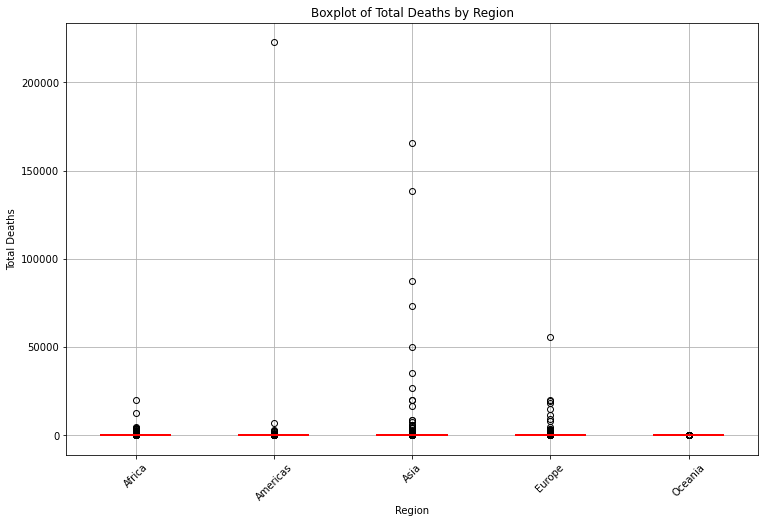

In [61]:
def plot_boxplot_grouped_by_variable(data, gb_variable, variable):
    # Create a boxplot grouped by 'gb_variable'
    boxprops = dict(linestyle='-', linewidth=2, color='black')
    medianprops = dict(linestyle='-', linewidth=2, color='red')
    whiskerprops = dict(linestyle='--', linewidth=1, color='black')
    capprops = dict(linestyle='-', linewidth=1, color='black')
    
    data.boxplot(column=variable, by=f'{gb_variable}', figsize=(12, 8), boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
    
    # Set plot title and labels
    plt.title(f'Boxplot of {variable} by {gb_variable}')
    plt.xlabel('Region')
    plt.ylabel(variable)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.suptitle("")
    
    # Show plot
    plt.show()


plot_boxplot_grouped_by_variable(df, 'Region', 'Total Deaths')


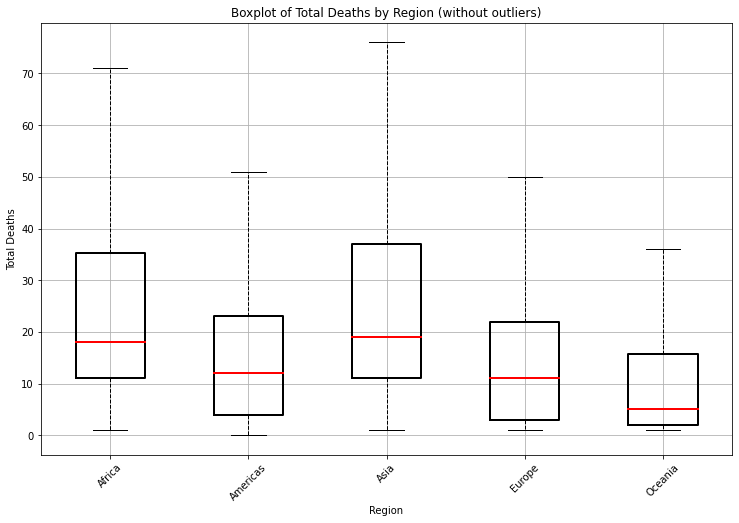

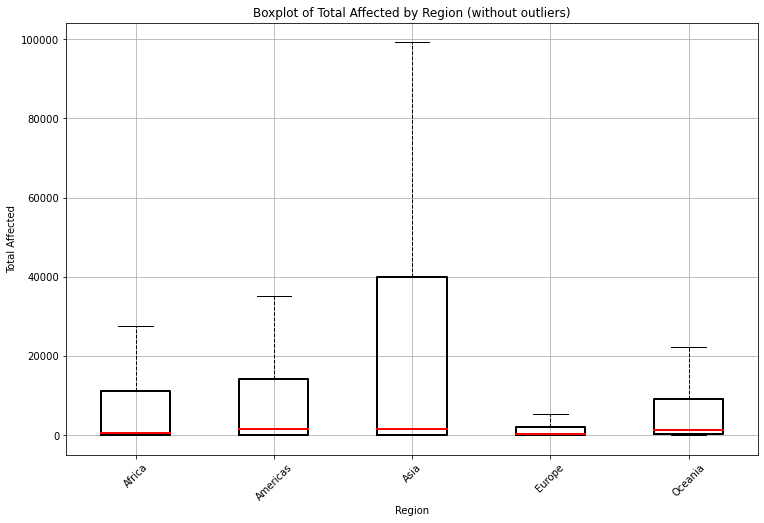

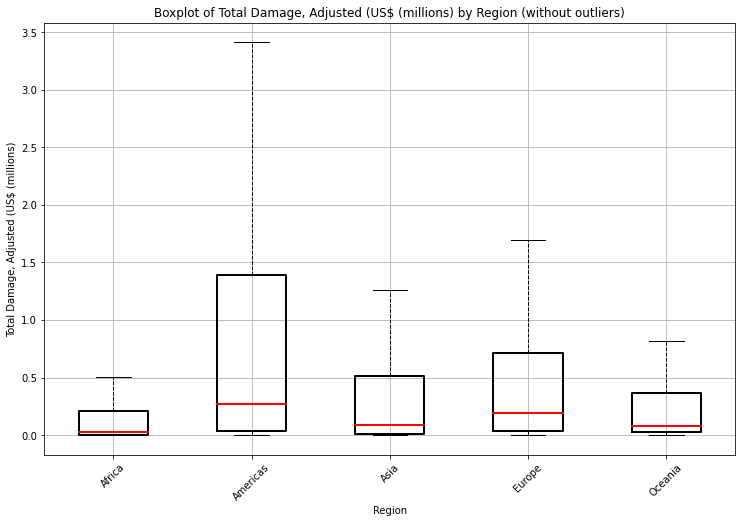

In [62]:

def plot_boxplot_grouped_by_variable_no_outlier(data, gb_variable, variable):
    # Create a boxplot grouped by 'gb_variable' without showing outliers
    boxprops = dict(linestyle='-', linewidth=2, color='black')
    medianprops = dict(linestyle='-', linewidth=2, color='red')
    whiskerprops = dict(linestyle='--', linewidth=1, color='black')
    capprops = dict(linestyle='-', linewidth=1, color='black')
    
    data.boxplot(column=variable, by=f'{gb_variable}', figsize=(12, 8), showfliers=False, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
    
    # Set plot title and labels
    plt.title(f'Boxplot of {variable} by {gb_variable} (without outliers)')
    plt.xlabel('Region')
    plt.ylabel(variable)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Remove the automatically added title
    plt.suptitle("")
    
    # Show plot
    plt.show()


plot_boxplot_grouped_by_variable_no_outlier(df, 'Region', 'Total Deaths')
plot_boxplot_grouped_by_variable_no_outlier(df, 'Region', 'Total Affected')
plot_boxplot_grouped_by_variable_no_outlier(df, 'Region', 'Total Damage, Adjusted (US$ (millions)')

Deaths in Africa and Asia Seem have a higher distrubution then the rest of the continents.
Lets look by subreigon next

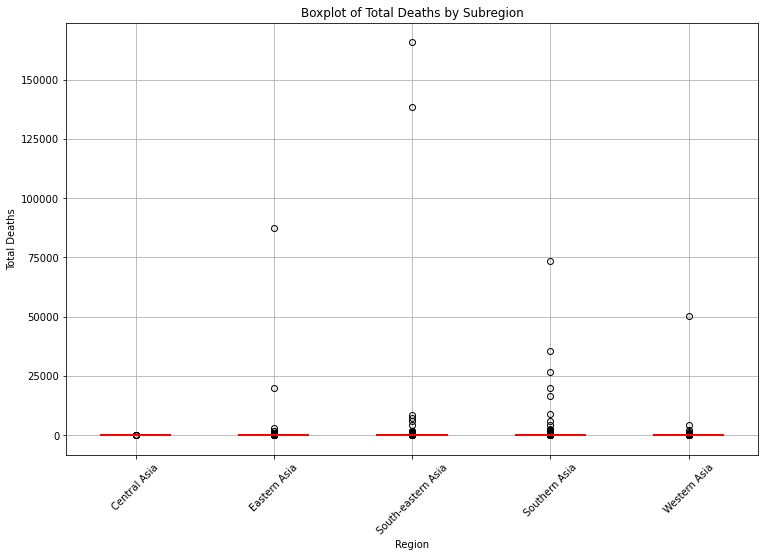

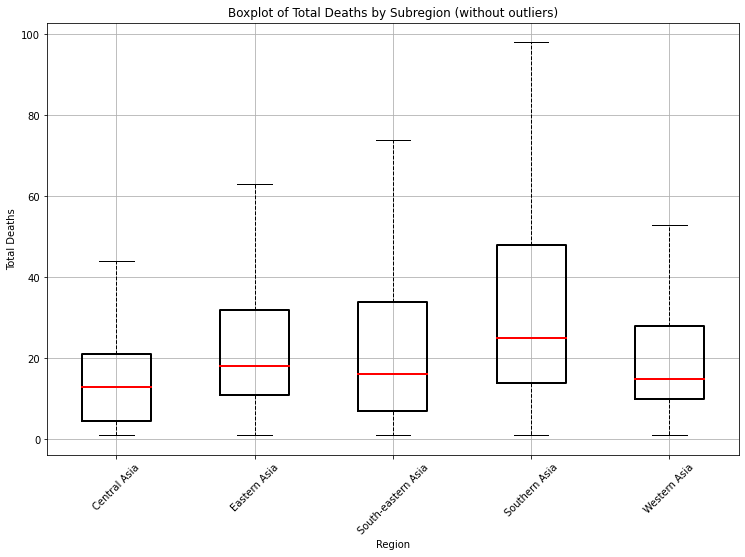

In [63]:
_df = df[df['Region']=='Asia']
plot_boxplot_grouped_by_variable(_df, 'Subregion', 'Total Deaths')
plot_boxplot_grouped_by_variable_no_outlier(_df, 'Subregion', 'Total Deaths')

South Eastern Asia and Southern Asia prone to lots of disasters

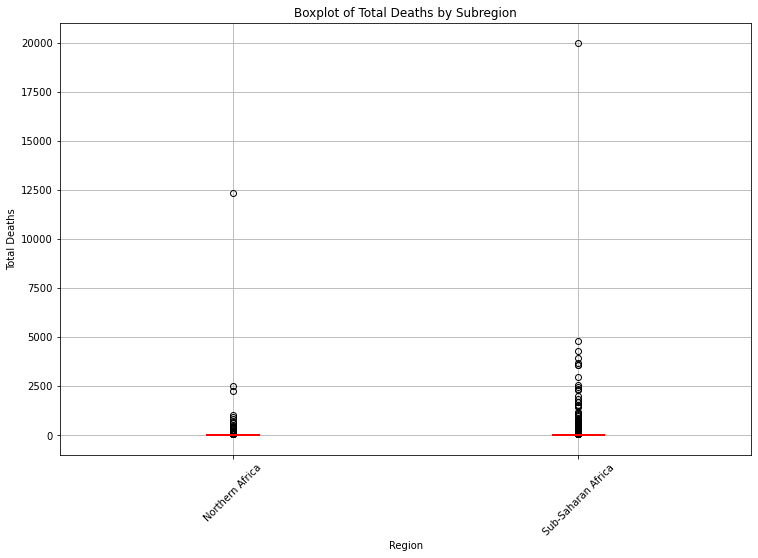

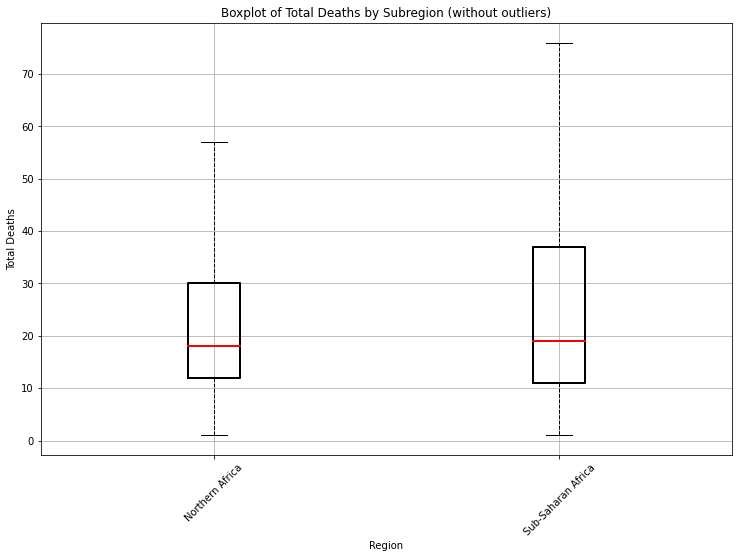

In [64]:
_df = df[df['Region']=='Africa']
plot_boxplot_grouped_by_variable(_df, 'Subregion', 'Total Deaths')
plot_boxplot_grouped_by_variable_no_outlier(_df, 'Subregion', 'Total Deaths')

Sub Saharan Africa is also high for deaths
Now, What type of Disasters are happening where? 

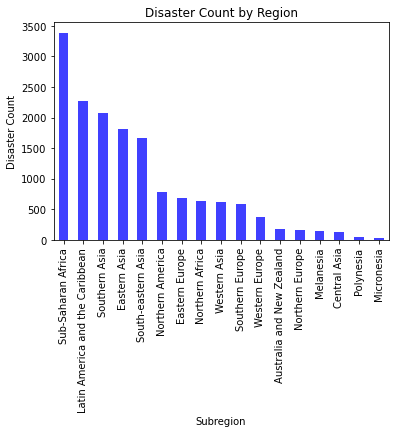

,Region,Subregion,Disaster Count
1,Africa,Sub-Saharan Africa,3385
2,Americas,Latin America and the Caribbean,2273
7,Asia,Southern Asia,2072
5,Asia,Eastern Asia,1806
6,Asia,South-eastern Asia,1668
3,Americas,Northern America,782
9,Europe,Eastern Europe,691
0,Africa,Northern Africa,631
8,Asia,Western Asia,612
11,Europe,Southern Europe,589


In [65]:

disaster_counts = df.groupby(['Region', 'Subregion'])['Disaster Type'].count().reset_index(name='Disaster Count')
disaster_counts_sorted = disaster_counts.sort_values(by='Disaster Count', ascending=False)
disaster_counts_sorted.head(30)

disaster_counts_sorted.plot(kind='bar', x='Subregion', y='Disaster Count', color='blue', alpha=0.75, legend=None)

# Add labels and title
plt.xlabel('Subregion')
plt.ylabel('Disaster Count')
plt.title('Disaster Count by Region')

# Show the plot
plt.show()
disaster_counts_sorted.head(30)

Frequent disasters occur in Sub saharan Africa,  Latin America, Soutehrn Asia, Eastern Asia, South Eastern Asia

/Users/samharris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samharris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samharris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samharris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



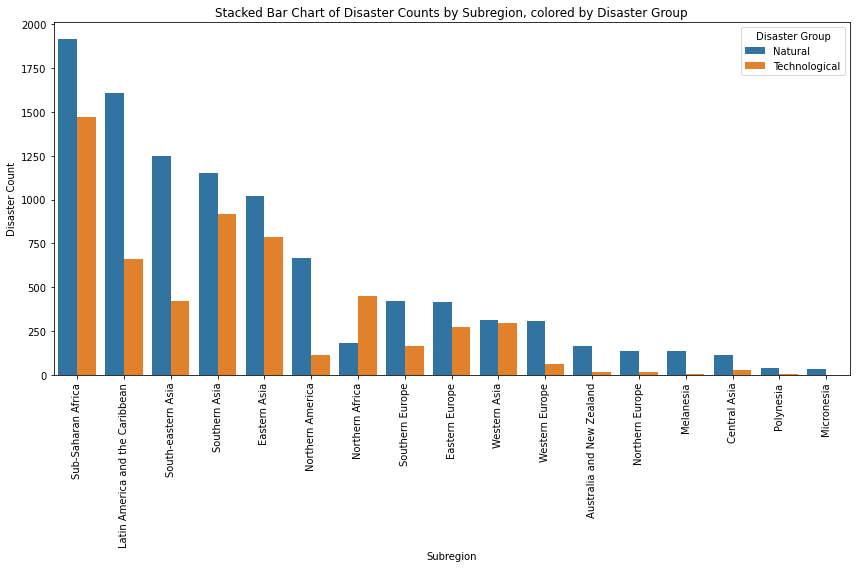

,Subregion,Disaster Group,Disaster Count
28,Sub-Saharan Africa,Natural,1915
8,Latin America and the Caribbean,Natural,1609
29,Sub-Saharan Africa,Technological,1470
22,South-eastern Asia,Natural,1246
24,Southern Asia,Natural,1152
4,Eastern Asia,Natural,1021
25,Southern Asia,Technological,920
5,Eastern Asia,Technological,785
16,Northern America,Natural,667
9,Latin America and the Caribbean,Technological,664


In [66]:
disaster_counts = df.groupby(['Subregion', 'Disaster Group'])['Disaster Type'].count().reset_index(name='Disaster Count')
disaster_counts_sorted = disaster_counts.sort_values(by='Disaster Count', ascending=False)


# Create a bar plot with bars stacked on top of each other
plt.figure(figsize=(12, 8))
sns.barplot(data=disaster_counts_sorted, x='Subregion', y='Disaster Count', hue='Disaster Group', dodge=True)

# Add labels and title
plt.xlabel('Subregion')
plt.ylabel('Disaster Count')
plt.title('Stacked Bar Chart of Disaster Counts by Subregion, colored by Disaster Group')

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.legend(title='Disaster Group')
plt.tight_layout()
plt.show()

disaster_counts_sorted.head(30)

Human caused disasters more often in asia and africa

In [67]:
disaster_counts = df.groupby(['Region', 'Subregion', 'Disaster Subtype'])['Disaster Type'].count().reset_index(name='Disaster Count')
disaster_counts_sorted = disaster_counts.sort_values(by='Disaster Count', ascending=False)
disaster_counts_sorted.head(30)

,Region,Subregion,Disaster Subtype,Disaster Count
67,Africa,Sub-Saharan Africa,Road,730
66,Africa,Sub-Saharan Africa,Riverine flood,446
115,Americas,Latin America and the Caribbean,Riverine flood,391
323,Asia,Southern Asia,Road,373
116,Americas,Latin America and the Caribbean,Road,357
123,Americas,Latin America and the Caribbean,Tropical cyclone,350
36,Africa,Sub-Saharan Africa,Bacterial disease,344
75,Africa,Sub-Saharan Africa,Water,329
49,Africa,Sub-Saharan Africa,Flood (General),282
202,Asia,Eastern Asia,Explosion (Industrial),279


Road, Flood, Cyclone, epidemics common in Asia and Africa

In [68]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

Next Step: Plotly Map showing disaster cost with year slider. If you click on the country, more stats are given including that countries worst disaster that year. So for that worst disaster show subtype, location, name, number of deaths, cost, Date, mag scale.

In [69]:
import plotly.express as px

_d = df.loc[:, ['Country', 'Start Year', 'ISO', 'Total Deaths']].groupby(['Country', 'Start Year', 'ISO'], as_index=False).sum().rename(columns={'Total Deaths': 'Total Deaths'})

fig = px.choropleth(_d, 
                    locations='ISO', 
                    color='Total Deaths', 
                    hover_name='Country', 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame='Start Year') 

#fig.update_layout(title_text='Costs Map with Year Slider')
#fig.show()

In [70]:
import plotly.express as px

_d = df.groupby(['Country', 'Start Year', 'ISO'], as_index=False).sum().rename(columns={'Total Deaths': 'Total Deaths'})
max_deaths = df.groupby(['Country', 'Start Year'])['Total Deaths'].max().reset_index().rename(columns={'Total Deaths': 'Max Deaths'})
disaster_count = df.groupby(['Country', 'Start Year'])['Classification Key'].count().reset_index().rename(columns={'Classification Key': 'Disaster Count'})

_d = _d.merge(max_deaths, on=['Country', 'Start Year'], how='left')
_d = _d.merge(disaster_count, on=['Country', 'Start Year'], how='left')


_d['hover_text'] = _d['Country'] + '<br>' + \
                   'Max Deaths (Worst Disaster): ' + _d['Max Deaths'].astype(str) + '<br>' + \
                   'Disaster Count: ' + _d['Disaster Count'].astype(str)

fig = px.choropleth(_d, 
                    locations='ISO', 
                    color='Total Deaths', 
                    hover_name='Country', 
                    hover_data={'hover_text': True},  # Add hover text
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame='Start Year') 

#fig.update_layout(title_text='Costs Map with Year Slider')
#fig.show()


In [71]:
### Test

df['Total Deaths'] = df['Total Deaths'].fillna(0)
max_death_events = df.loc[df.groupby(['Country', 'Start Year'])['Total Deaths'].idxmax(), ['Country', 'Start Year', 'Disaster Subtype', 'Location', 'Event Name']] # Adjust columns as needed
df['Total Deaths'] = df['Total Deaths'].replace(pd.NA, 0)

_d = df.groupby(['Country', 'Start Year', 'ISO'], as_index=False).sum().rename(columns={'Total Deaths': 'Total Deaths'})
max_deaths = df.groupby(['Country', 'Start Year'])['Total Deaths'].max().reset_index().rename(columns={'Total Deaths': 'Max Deaths'})
disaster_count = df.groupby(['Country', 'Start Year'])['Classification Key'].count().reset_index().rename(columns={'Classification Key': 'Disaster Count'})

_d = _d.merge(max_deaths, on=['Country', 'Start Year'], how='left')
_d = _d.merge(disaster_count, on=['Country', 'Start Year'], how='left')
_d = _d.merge(max_death_events, on=['Country', 'Start Year'], how='left')

_d['hover_text'] = _d['Country'] + '<br>' + \
                   'Deaths (Worst Disaster): ' + _d['Max Deaths'].astype(str) + '<br>' + \
                   'Disaster Subtype (Worst Disaster): ' + _d['Disaster Subtype_y'].astype(str) + '<br>' + \
                   'Event Name (Worst Disaster): ' + _d['Event Name_y'].astype(str) + '<br>' + \
                   'Total Disaster Count: ' + _d['Disaster Count'].astype(str)


fig = px.choropleth(_d, 
                    locations='ISO', 
                    color='Total Deaths', 
                    hover_name='Country', 
                    hover_data={'hover_text': True},  # Add hover text
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame='Start Year') 

fig.update_layout(title_text='Deaths Map with Year Slider')
fig.show()

### Created Map which shows deaths by color with a year slider. It also shows the worst disaster that occurred that year in the country that you hover over

## Week 5

In [72]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

In [73]:
df.isna().sum()

DisNo.                                        0
Classification Key                            0
Disaster Group                                0
Disaster Subgroup                             0
Disaster Type                                 0
Disaster Subtype                              0
Event Name                                10666
ISO                                           0
Country                                       0
Subregion                                     0
Region                                        0
Location                                    628
Origin                                    11702
Associated Types                          12373
Appeal                                        0
Declaration                                   0
AID Contribution ('000 US$)               15083
Magnitude                                 12217
Magnitude Scale                            5839
Latitude                                  13764
Longitude                               

In [74]:
# For events with a defined start and end date
_d = df.dropna(subset =['End Day'])
_d = _d.dropna(subset =['Start Day'])
_d.shape

(13978, 44)

In [75]:
import pandas as pd

# Assuming _d is your DataFrame

# Define a function to parse the date string and convert it into datetime
def parse_date(row):
    try:
        parts = row.split('-')  # Split the string by dashes
        year = int(parts[0])  # Extract the year part
        month = int(parts[1].split('.')[0])  # Extract the month part and remove any trailing decimals
        day = int(parts[2].split('.')[0])  # Extract the day part and remove any trailing decimals
        return pd.Timestamp(year=year, month=month, day=day)  # Create a datetime object
    except:
        return pd.NaT  # Return NaT if parsing fails

# Apply the custom function to create the 'Start Date' column
_d['Start Date'] = _d['Start Year'].astype(str) + '-' + _d['Start Month'].astype(str) + '-' + _d['Start Day'].astype(str)
_d['Start Date'] = _d['Start Date'].apply(parse_date)

_d['End Date'] = _d['End Year'].astype(str) + '-' + _d['End Month'].astype(str) + '-' + _d['End Day'].astype(str)
_d['End Date'] = _d['End Date'].apply(parse_date)

# Drop the original separate columns if needed
_d.drop(['Start Year', 'Start Month', 'Start Day'], axis=1, inplace=True)
_d.drop(['End Year', 'End Month', 'End Day'], axis=1, inplace=True)

print(_d['Start Date'])
print(_d['End Date'])

3       2000-01-26
4       2000-01-08
6       2000-01-12
7       2000-01-01
8       2000-01-09
           ...    
15563   2023-12-25
15564   2023-12-26
15565   2023-12-30
15566   2023-12-07
15571   2023-03-01
Name: Start Date, Length: 13978, dtype: datetime64[ns]
3       2000-01-26
4       2000-01-15
6       2000-01-12
7       2000-01-01
8       2000-01-09
           ...    
15563   2023-12-25
15564   2023-12-26
15565   2024-01-03
15566   2024-01-15
15571   2023-12-31
Name: End Date, Length: 13978, dtype: datetime64[ns]


#### Now we have the start and end date variables

In [76]:

_d['Event Duration'] = _d['End Date'] - _d['Start Date']


In [77]:
_d['Event Duration']

3         0 days
4         7 days
6         0 days
7         0 days
8         0 days
          ...   
15563     0 days
15564     0 days
15565     4 days
15566    39 days
15571   305 days
Name: Event Duration, Length: 13978, dtype: timedelta64[ns]

/Users/samharris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samharris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samharris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



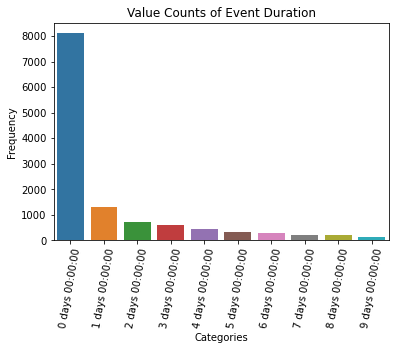

In [78]:
# Calculate the value counts of the column
value_counts = _d['Event Duration'].value_counts().head(10)

# Create a bar plot using Seaborn
sns.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Value Counts of Event Duration')

# Rotate x-axis labels if needed
plt.xticks(rotation=80)

# Show the plot
plt.show()


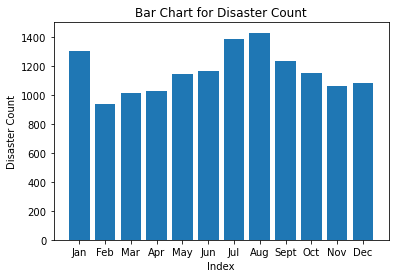

In [79]:
# Group by month
_d_month = _d.groupby(_d['Start Date'].dt.month).count()

# Rename the index to month names if needed
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
_d_month.index = [month_names[i-1] for i in _d_month.index]

# Plot a bar chart
plt.bar(_d_month.index, _d_month['DisNo.'])

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Disaster Count')
plt.title('Bar Chart for Disaster Count')

# Show the plot
plt.show()

In [80]:
_d['Disaster Type'].value_counts()

Disaster Type
Flood                               3695
Storm                               2457
Road                                2084
Water                               1093
Earthquake                           658
Epidemic                             473
Explosion (Industrial)               454
Mass movement (wet)                  439
Air                                  429
Fire (Miscellaneous)                 410
Extreme temperature                  264
Rail                                 247
Wildfire                             213
Miscellaneous accident (General)     176
Explosion (Miscellaneous)            158
Collapse (Miscellaneous)             156
Collapse (Industrial)                145
Volcanic activity                    114
Fire (Industrial)                    110
Industrial accident (General)         99
Gas leak                              33
Chemical spill                        20
Poisoning                             14
Mass movement (dry)                   13
Dr

<Figure size 1008x432 with 0 Axes>

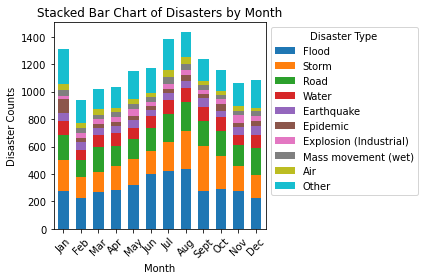

In [81]:
# Count the occurrences of each disaster type
_d['Month'] = _d['Start Date'].dt.month
disaster_type_counts = _d['Disaster Type'].value_counts()

# Select the top 9 most common disaster types
top_disaster_types = disaster_type_counts.head(9).index

# Group by month and disaster type, then count the occurrences
_d_grouped = _d.groupby(['Month', 'Disaster Type']).size().unstack(fill_value=0)

# Combine the counts of remaining disaster types into an 'Other' category
other_disaster_types = disaster_type_counts.index.difference(top_disaster_types)
_d_grouped['Other'] = _d_grouped[other_disaster_types].sum(axis=1)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
_d_grouped.index = [month_names[i-1] for i in _d_grouped.index]

# Plot a stacked bar chart with increased width
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
_d_grouped[top_disaster_types.tolist() + ['Other']].plot(kind='bar', stacked=True, width=0.6)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Disaster Counts')
plt.title('Stacked Bar Chart of Disasters by Month')

# Show the legend outside the chart area
plt.legend(title='Disaster Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

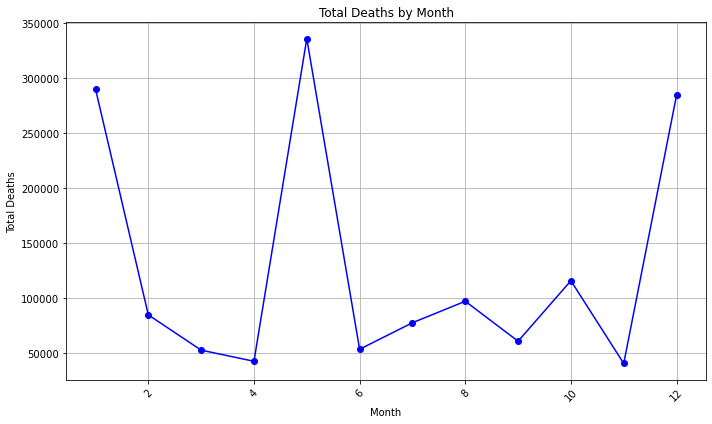

In [82]:
import numpy as np

total_deaths_by_month = _d.groupby('Month')['Total Deaths'].sum()

# Convert index and values to NumPy arrays
months = total_deaths_by_month.index.to_numpy()
total_deaths = total_deaths_by_month.to_numpy()

# Plot a point for each month representing the total deaths
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(months, total_deaths, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Month')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)  # Add grid for better readability
plt.show()


In [83]:
def deaths_by_month_and_country(country_name):
    #Group by month and country and sum the total deaths
    total_deaths_by_month = _d.groupby(['Month', 'Country'])['Total Deaths'].sum().reset_index()

    # Now 'Country' is a column, but you can still group by it if needed
    country_data = total_deaths_by_month[total_deaths_by_month['Country'] == country_name]

    # Plot a point for each month representing the total deaths
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot(np.array(country_data['Month']), np.array(country_data['Total Deaths']), marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Total Deaths')
    plt.title('Total Deaths by Month for {}'.format(country_name))  # Include country name in the title

    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.grid(True)  # Add grid for better readability
    plt.show()


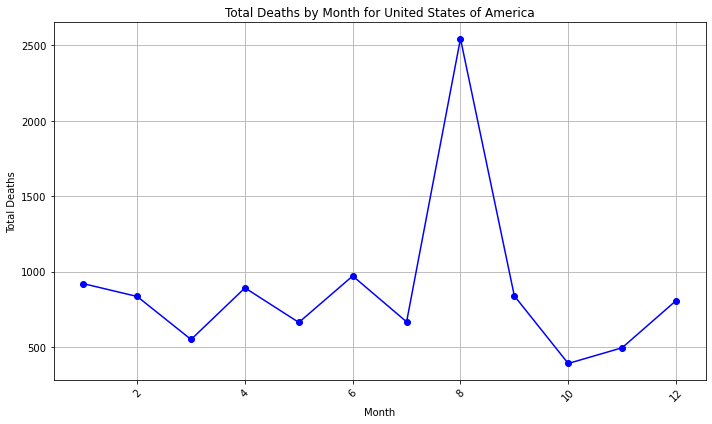

In [84]:
deaths_by_month_and_country('United States of America')

In [85]:
_d.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp', 'Start Date', 'End Date', 'Event Duration',
       'Month'],
      dtype='object')

## World Bank data analysis

In [86]:
df[['pop_den', 'gdp_per_cap', 'i_mort', 'co2_emissions', 'electricity_percentage', 'life_expectancy']].describe()

,pop_den,gdp_per_cap,i_mort,co2_emissions,electricity_percentage,life_expectancy
count,14315.000000,14729.000000,14236.000000,13636.000000,14294.000000,14299.000000
mean,165.534984,9159.295795,32.568383,3.826551,77.380793,68.845704
std,465.200761,15182.690477,27.346521,4.667229,30.195993,8.873568
min,1.583894,110.460875,1.700000,0.000000,1.277265,41.957000
25%,35.063329,1022.732467,10.900000,0.637262,59.500000,63.571500
50%,89.607769,2671.777522,23.600000,1.752534,95.726227,70.720000
75%,176.721733,8329.002067,49.300000,5.563294,99.800000,75.340000
max,20734.058442,133711.794436,138.600000,39.582140,100.000000,85.492683


In [88]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

### Mapped world bank columns to a 1 to 10 value to get a better analysis for rich v poor countries

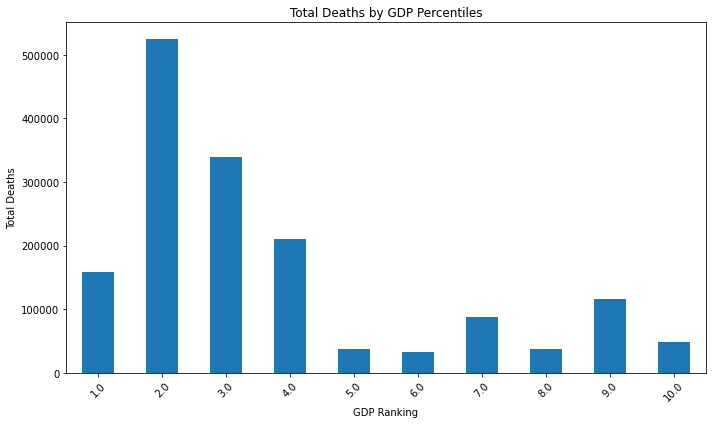

In [91]:
grouped_data = df.groupby('mv_gdp')['Total Deaths'].sum()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size if necessary
grouped_data.plot(kind='bar')
plt.xlabel('GDP Ranking')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by GDP Percentiles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()